## 0.1 Import 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## 0.2 Load DataFrame

In [14]:
df = pd.read_csv('./us_bank_wages/us_bank_wages.txt', delim_whitespace=True)# sep="\")

## 1. Exploration data analysis (EDA) 
target : Salary

## * basic overview

In [15]:
# first rows 
df.head()

SALARY  EDUC  SALBEGIN  GENDER  MINORITY  JOBCAT
0   57000    15     27000       1         0       3
1   40200    16     18750       1         0       1
2   21450    12     12000       0         0       1
3   21900     8     13200       0         0       1
4   45000    15     21000       1         0       1

In [16]:
# rename to convention
df.rename(columns= {'SALARY':'salary', 'EDUC':'educ', 'SALBEGIN':'salbegin', 'GENDER':'gender', 'MINORITY':'minority', 'JOBCAT':'jobcat'}, inplace=True)
df.columns

Index(['salary', 'educ', 'salbegin', 'gender', 'minority', 'jobcat'], dtype='object')

In [17]:
# shape 
df.shape

(474, 6)

In [18]:
# general info: check for NaNs and DataType
df.info() # -> if Dtype contains no Objects -> no further action required

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   salary    474 non-null    int64
 1   educ      474 non-null    int64
 2   salbegin  474 non-null    int64
 3   gender    474 non-null    int64
 4   minority  474 non-null    int64
 5   jobcat    474 non-null    int64
dtypes: int64(6)
memory usage: 25.9 KB


In [19]:
# check for NaNs, just to be sure
df.isnull().values.any() # if False -> no further action required

False

In [20]:
# general statistic overview
df.describe() # -> no

salary        educ      salbegin      gender    minority  \
count     474.000000  474.000000    474.000000  474.000000  474.000000   
mean    34419.567511   13.491561  17016.086498    0.544304    0.219409   
std     17075.661465    2.884846   7870.638154    0.498559    0.414284   
min     15750.000000    8.000000   9000.000000    0.000000    0.000000   
25%     24000.000000   12.000000  12487.500000    0.000000    0.000000   
50%     28875.000000   12.000000  15000.000000    1.000000    0.000000   
75%     36937.500000   15.000000  17490.000000    1.000000    0.000000   
max    135000.000000   21.000000  79980.000000    1.000000    1.000000   

           jobcat  
count  474.000000  
mean     1.411392  
std      0.773201  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      3.000000

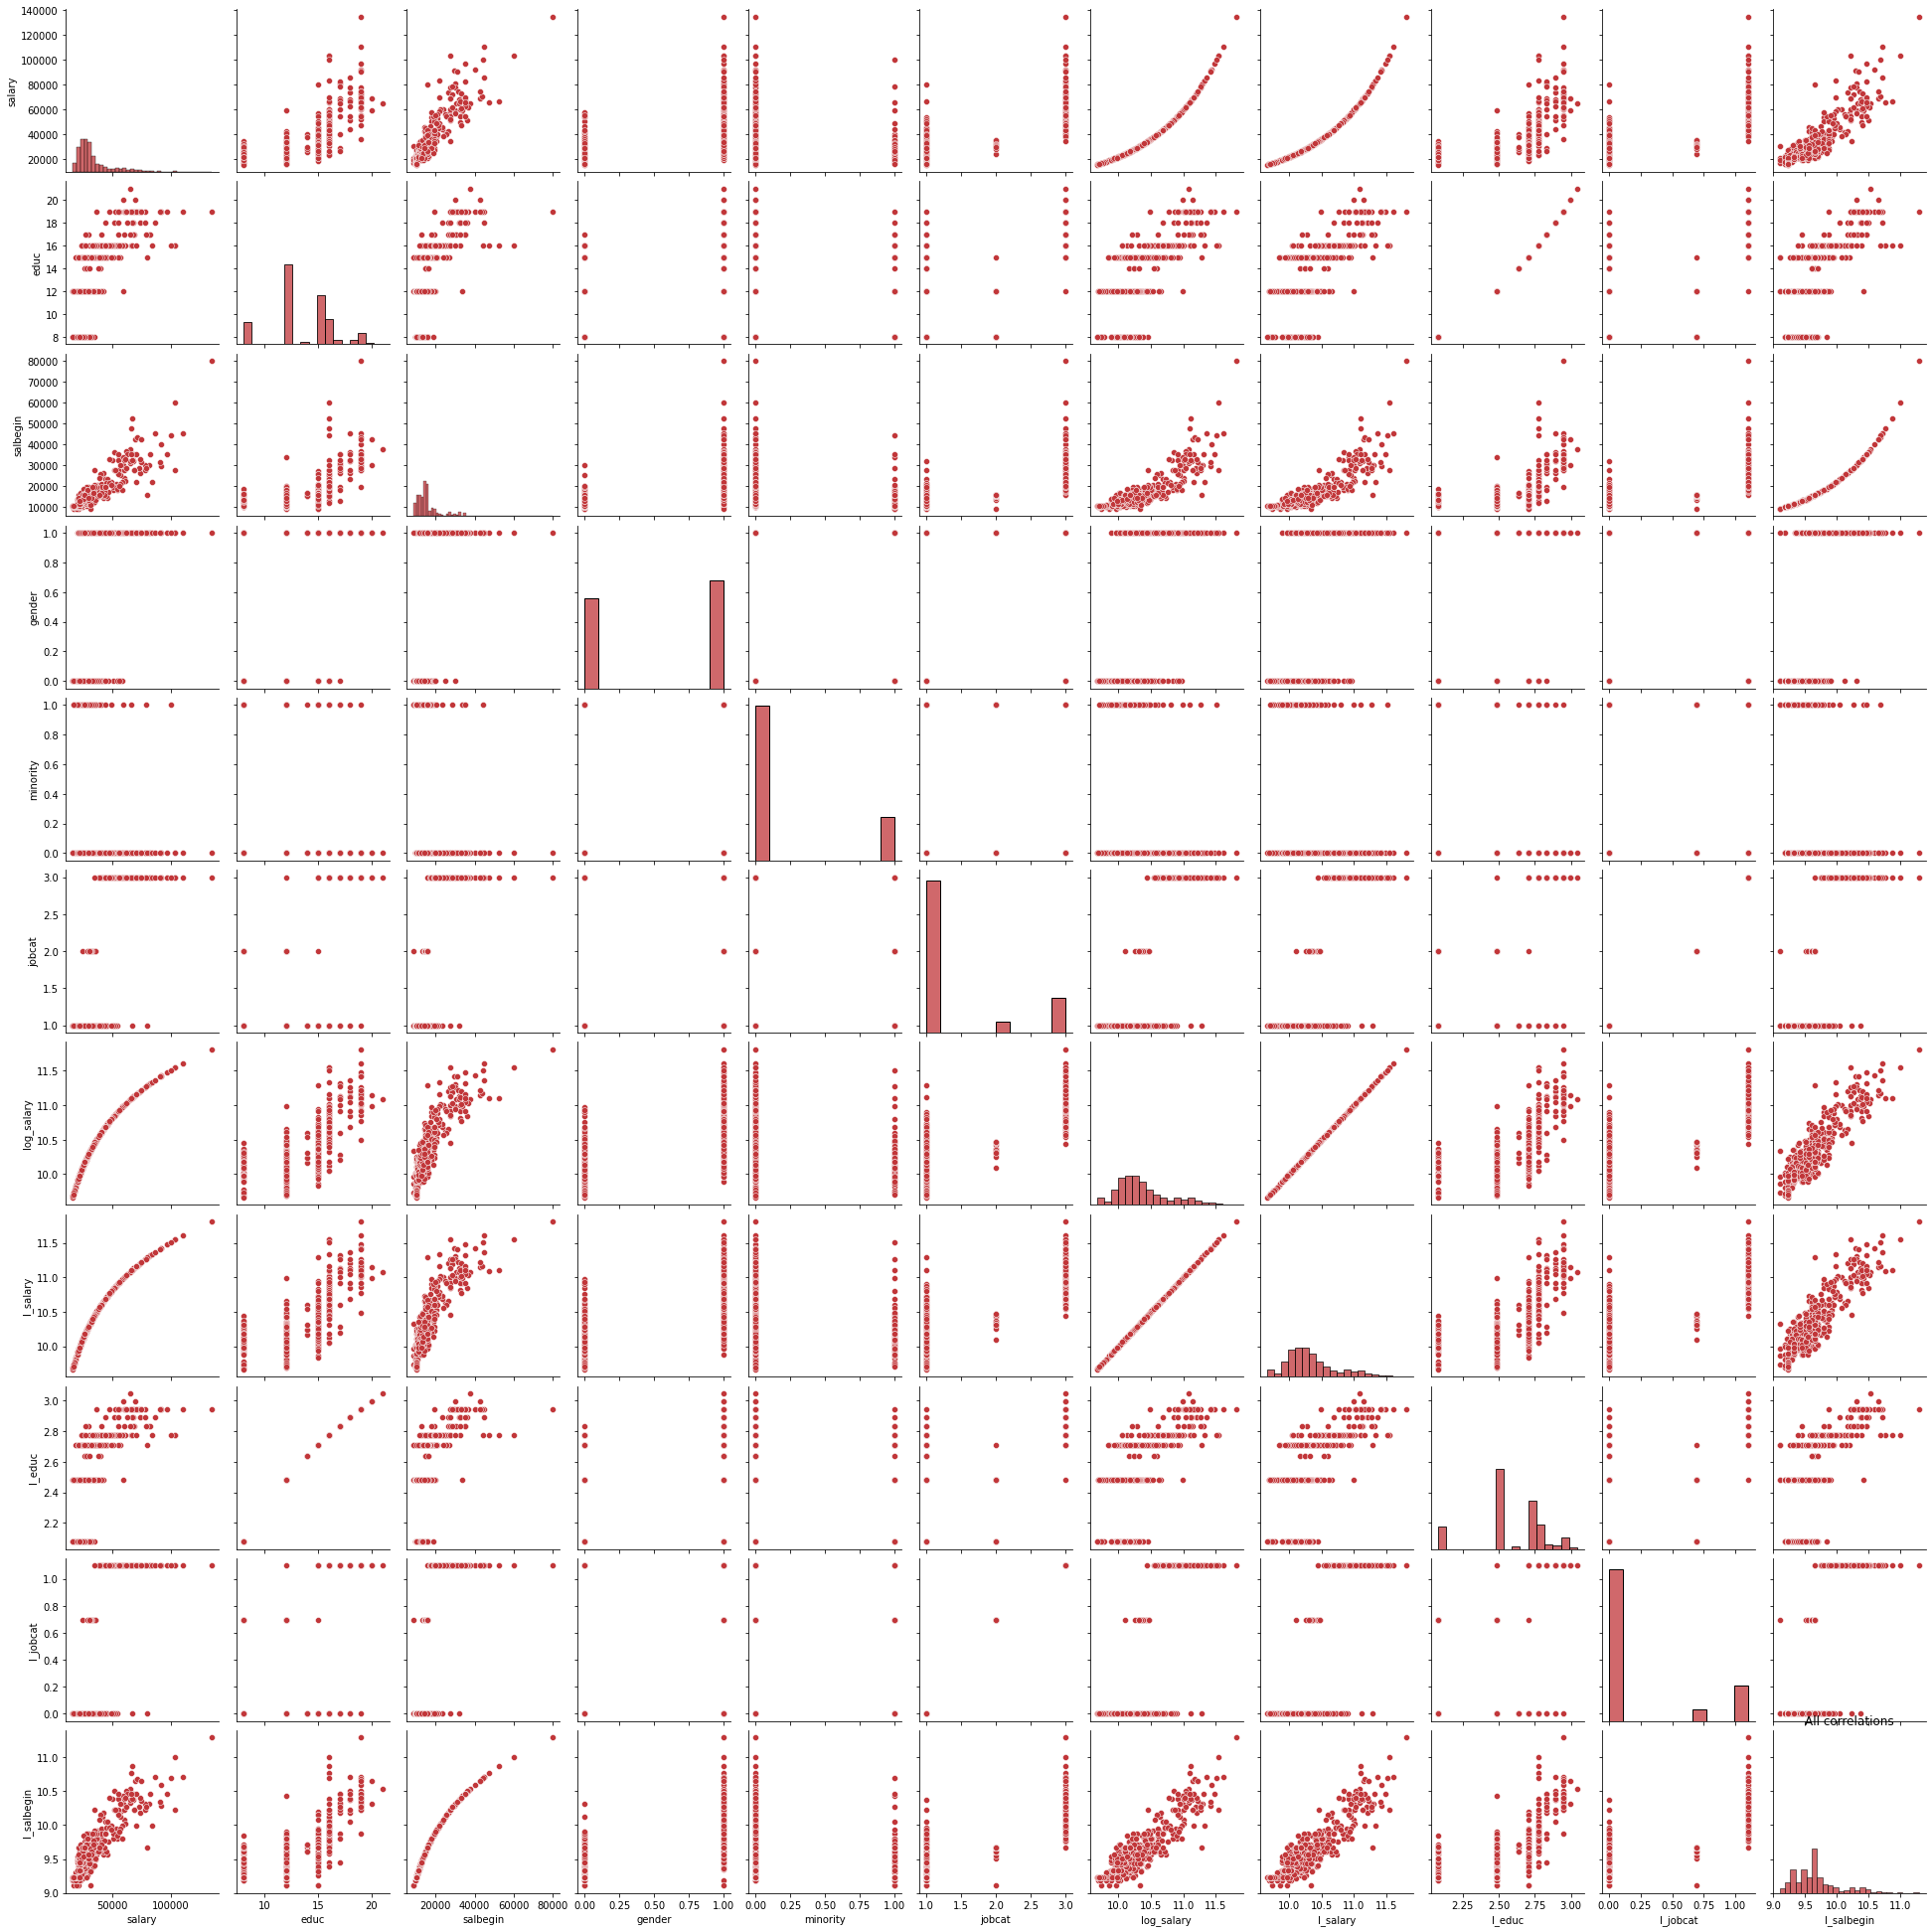

In [43]:
# visuell overview, first hint for correlations  with a plot which shows the distribution between all variables
sns.set_palette('RdGy') # Note: will set colorpattern for all following until told different
sns.pairplot(df)
plt.title('All correlations')
plt.show() 
# -> susbect correlation between: 'salary' and 'educ', 'salary' and 'salbegin'
# -> susbect 'gender', 'minority', 'jobcat' to be categorically

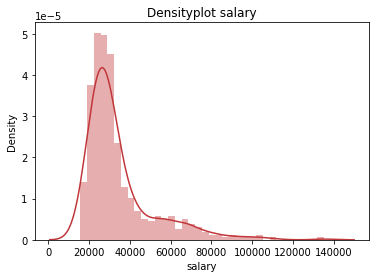

In [51]:
## look on distribution of target
sns.distplot(df['salary'])
plt.title('Densityplot salary')
plt.show()
# the salary distribution is skewed right, to get ride of the outliners using the log function could help 

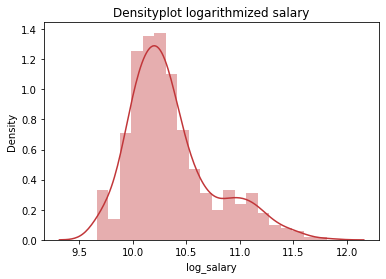

In [52]:
# dirstribution of the logarithmized target
df_log = df
df_log['log_salary'] =np.log(df_log['salary'])
sns.distplot(df_log['log_salary'])

plt.title('Densityplot logarithmized salary')
plt.show()
# -> no more outliners to see

## * Hypothesis

1. Salary depends on education level:

   $H_{0} = \beta_{edc} = 0$

   $H_{1} = \beta_{edc} > 0$
   
2. Salary depends on the first salary:

   $H_{0} = \beta_{salbegin} = 0$

   $H_{1} = \beta_{salebegin} > 0$

3. Salary depends on job category:

   $H_{0} = \beta_{jobcat} = 0$

   $H_{1} = \beta_{jobcat} > 0$
   

## * Correlations and chose the best model

In [24]:
# overview over all possible R^2, without dummies
l = []
for i in df.columns:
    l.append(i)

dic = 'salaey ~ {:}'.format(l)
dic_show = 'salary ~ {:}'.format(l)

rs = []
for i in l:
    dic = 'salary ~ {:}'.format(i)
    rs.append(smf.ols(formula=dic, data=df).fit().rsquared)

display(dic_show)
rs
# -> subsctw correlation with: 'educ', 'salebegin', 'jobcat'

"salary ~ ['salary', 'educ', 'salbegin', 'gender', 'minority', 'jobcat', 'log_salary']"

[1.0,
 0.43633807232128796,
 0.7746067532540755,
 0.20243070229202165,
 0.03144852085826877,
 0.6085792000115462,
 0.9337173300697782]

### ** with OLS

In [25]:
# for all without dummies
fit_all = smf.ols('salary ~ educ + salbegin + jobcat + gender + minority', data=df).fit()
fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     434.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          3.07e-173
Time:                        09:42:59   Log-Likelihood:                -4881.4
No. Observations:                 474   AIC:                             9775.
Df Residuals:                     468   BIC:                             9800.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6963.9156   1672.249     -4.164      0.000   -1.02e+04   -3677.870
educ         890.6082    150.119      5.933      0.000     595.618    1185.598
salbegin       1.2359      0.074     16.793      0.000       1.091       1.380
jobcat      5550.3397    658.226      8.432      0.000    4256.896    6843.783
gender      1504.7854    765.637      1.965      0.050       0.274    3009.297
minority   -1432.6138    826.409     -1.734      0.084   -3056.545     191.317
==============================================================================
Omnibus:                      199.215   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.680
Skew:                           1.610   Prob(JB):                         0.00
Kurtosis:                      11.467   Cond. No.                     9.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# for all with dummies
fit_all = smf.ols('salary ~ educ + salbegin + C(jobcat) + C(gender) + C(minority)', data=df).fit()
fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     363.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          1.97e-172
Time:                        09:42:59   Log-Likelihood:                -4880.1
No. Observations:                 474   AIC:                             9774.
Df Residuals:                     467   BIC:                             9803.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          151.2521   2045.615      0.074      0.941   -3868.497    4171.002
C(jobcat)[T.2]    3242.6141   1608.100      2.016      0.044      82.607    6402.622
C(jobcat)[T.3]    1.204e+04   1443.024      8.342      0.000    9201.516    1.49e+04
C(gender)[T.1]    1913.8399    807.490      2.370      0.018     327.076    3500.604
C(minority)[T.1] -1276.7892    831.042     -1.536      0.125   -2909.834     356.255
educ               785.6276    164.081      4.788      0.000     463.199    1108.056
salbegin             1.2100      0.075     16.070      0.000       1.062       1.358
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1584.068
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                      11.383   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
## => R^2: both deliver good correlations with 0,823 and 0,824 with negligible difference
## => p-Values: both calculations show that minority and gender are negligible

## ==> going futher only with the relevant parameter: 'educ', 'salbegin' and 'jobcat'

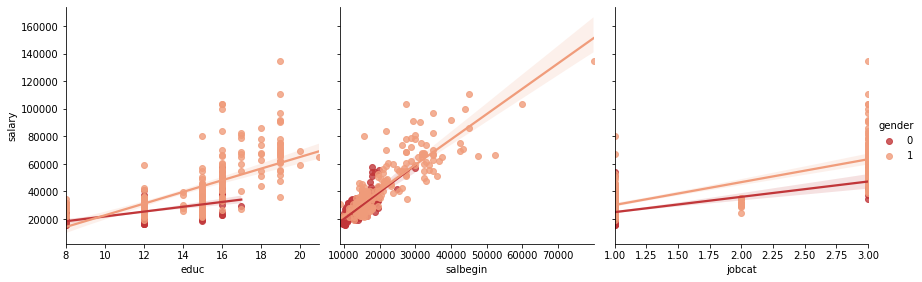

In [44]:
# but prior take let's visualise the influence of the droped parameter on the relevent
# for gender:
g = sns.PairGrid(df, y_vars=['salary'], x_vars=['educ', 'salbegin', 'jobcat'], hue='gender', height=4)
g.map(sns.regplot)
g.add_legend()
plt.show()

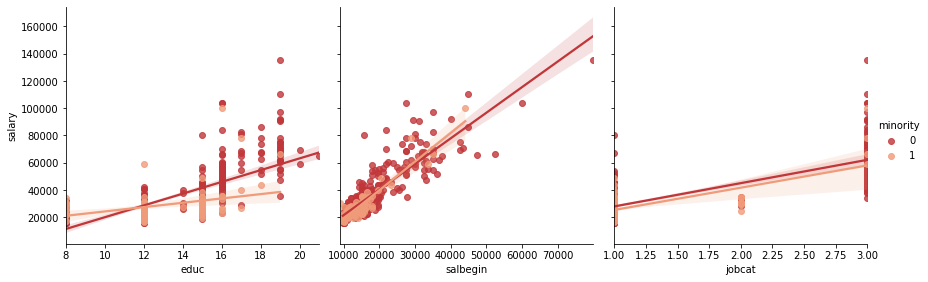

In [45]:
# for minority
g = sns.PairGrid(df, y_vars=['salary'], x_vars=['educ', 'salbegin', 'jobcat'], hue='minority', height=4)
g.map(sns.regplot)
g.add_legend()
plt.show()
# also the visualiations show that the two variables are negligibles

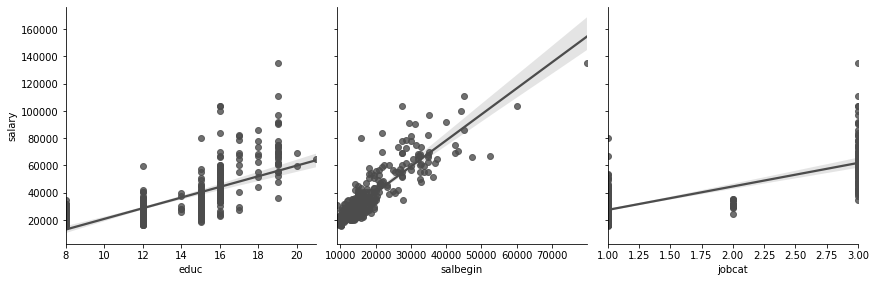

In [50]:
# Scatterplot of the relevents with linear relationship
g = sns.PairGrid(df, y_vars=['salary'], x_vars=['educ', 'salbegin', 'jobcat'], height=4)
g.map(sns.regplot, color='.3')
plt.show()

In [31]:
fit_rel = smf.ols('salary ~ educ + salbegin + jobcat', data=df).fit()
fit_rel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     716.2
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          7.82e-175
Time:                        09:43:04   Log-Likelihood:                -4884.3
No. Observations:                 474   AIC:                             9777.
Df Residuals:                     470   BIC:                             9793.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7786.9699   1632.558     -4.770      0.000    -1.1e+04   -4578.953
educ         929.2638    149.823      6.202      0.000     634.858    1223.670
salbegin       1.2744      0.072     17.749      0.000       1.133       1.415
jobcat      5657.0181    659.427      8.579      0.000    4361.229    6952.807
==============================================================================
Omnibus:                      203.100   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1699.390
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                      11.678   Cond. No.                     9.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
fit_rel = smf.ols('salary ~ educ + salbegin + C(jobcat)', data=df).fit()
fit_rel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     537.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          1.27e-173
Time:                        09:43:04   Log-Likelihood:                -4883.7
No. Observations:                 474   AIC:                             9777.
Df Residuals:                     469   BIC:                             9798.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1107.2923   2001.164     -0.553      0.580   -5039.649    2825.065
C(jobcat)[T.2]  4183.5074   1519.174      2.754      0.006    1198.277    7168.738
C(jobcat)[T.3]  1.193e+04   1438.397      8.296      0.000    9106.194    1.48e+04
educ             865.9721    160.920      5.381      0.000     549.758    1182.186
salbegin           1.2630      0.073     17.403      0.000       1.120       1.406
==============================================================================
Omnibus:                      200.959   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1683.275
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      11.647   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
## -> no difference in R^2

In [34]:
## the distribution plots led to the assumption that logarithmizing could give better estimations
## due to the negligible difference between with and without dumies, no dumies will  be used here

df_log = df
df_log['l_salary'] =np.log(df_log['salary'])
df_log['l_educ'] =np.log(df_log['educ'])
df_log['l_jobcat'] =np.log(df_log['jobcat'])
df_log['l_salbegin'] =np.log(df_log['salbegin'])

fit_log = smf.ols('l_salary ~ l_educ + l_salbegin + l_jobcat', data=df).fit()
fit_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               l_salary   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     718.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          4.35e-175
Time:                        09:43:04   Log-Likelihood:                 173.09
No. Observations:                 474   AIC:                            -338.2
Df Residuals:                     470   BIC:                            -321.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9346      0.332      8.845      0.000       2.283       3.587
l_educ         0.2901      0.043      6.680      0.000       0.205       0.375
l_salbegin     0.6851      0.039     17.408      0.000       0.608       0.762
l_jobcat       0.2113      0.028      7.637      0.000       0.157       0.266
==============================================================================
Omnibus:                       57.418   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.241
Skew:                           0.706   Prob(JB):                     1.15e-24
Kurtosis:                       4.894   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## * Model

 Due to the previous study the last correlation relation is chosen as model,

 this multiple regression model explains about 82% of the variation in 'salary'

 and is given by:

$ \hat{log(salary)} =  $ 2.9346 + 0.2901 x log(educ) + 0.6851 x log(salbegin)  + 0.2113 x log(jobcat)


=> this supports the Hypothesises

## Save for predictio in predict.py
Note: even so when this notebook only shows model choos based on the $R^2$ from the OLS, multiple test with the train-split method were made to minimize the RMSE value, scince it led to the same conclusion it's not presented here

In [54]:
X = df_log[['l_educ', 'l_salbegin', 'l_jobcat']]
Y = df['l_salary']
X.to_pickle('Xpart.csv')
Y.to_pickle('Ypart.csv')

## * Prediction

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Prediction
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
## RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

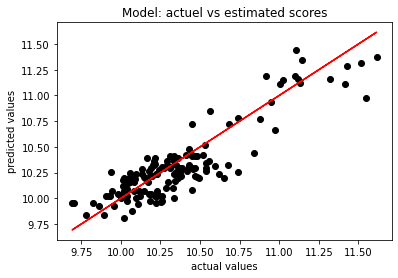

In [57]:
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Model: actuel vs estimated scores')
plt.show()